# DSCI 235 Final Project - Hannah Kim
## Topic : Factors Related to Recycling rate 

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### GDP (US Dollars/capita) 
- The standard measure of the value added created through the production of goods and services in a country during a certain period. (The data is restricted from 2017 to 2020.)

In [559]:
gdp = pd.read_csv('https://github.com/HannahKim99/DSCI235_FinalProject/raw/main/GDP.csv')
gdp = gdp.drop(columns = ['INDICATOR','MEASURE','SUBJECT','FREQUENCY','Flag Codes'])
gdp = gdp.rename(columns={'Value': 'GDP_Value'})
gdp.head()

,LOCATION,TIME,GDP_Value
0,AUS,2017,50699.175108
1,AUS,2018,52980.734327
2,AUS,2019,52669.473903
3,AUS,2020,55635.462558
4,AUT,2017,54188.360666


### Unemployment rate (% of labour force*)
- The unemployed are people of working age who are without work, are available for work, and have taken specific steps to find work. (The data is restricted from 2017 to 2020.)

\* the total number of unemployed people plus those in employment

In [579]:
umemployment = pd.read_csv('https://github.com/HannahKim99/DSCI235_FinalProject/raw/main/unemployment%20rate.csv')
umemployment = umemployment.drop(columns = ['INDICATOR','MEASURE','SUBJECT','FREQUENCY','Flag Codes'])
umemployment = umemployment.rename(columns={'Value': 'Unemployment'})
umemployment.head()

,LOCATION,TIME,Unemployment
0,AUS,2017,5.593760
1,AUS,2018,5.299855
2,AUS,2019,5.158916
3,AUS,2020,6.461826
4,AUT,2017,5.925000


### Pollution tax (% of GDP)
- Environmental tax especially on pollution emissions or solid waste disposal. (The data is restricted from 2017 to 2020.)

In [580]:
pollution = pd.read_csv('https://github.com/HannahKim99/DSCI235_FinalProject/raw/main/pollution%20tax.csv')
pollution = pollution.drop(columns = ['INDICATOR','MEASURE','SUBJECT','FREQUENCY','Flag Codes'])
pollution = pollution.rename(columns={'Value': 'Pollution tax'})
pollution.head()

,LOCATION,TIME,Pollution tax
0,AUT,2017,0.016921
1,AUT,2018,0.020584
2,AUT,2019,0.017454
3,AUT,2020,0.015035
4,BEL,2017,0.103516


### Material consumption (Tonnes/capita)
- The amount of materials (in terms of weight) used in an economy. (The data is restricted from 2017 to 2020.)

In [581]:
material_consumption = pd.read_csv('https://github.com/HannahKim99/DSCI235_FinalProject/raw/main/material%20consumption.csv')
material_consumption = material_consumption.drop(columns = ['INDICATOR','MEASURE','SUBJECT','FREQUENCY','Flag Codes'])
material_consumption = material_consumption.rename(columns={'Value': 'Consumption'})
material_consumption.head()

,LOCATION,TIME,Consumption
0,AUS,2017,38.8657
1,AUS,2018,38.9753
2,AUS,2019,40.5550
3,AUT,2017,18.8534
4,AUT,2018,18.9271


### Poverty rate (%)
- The percentage of the number of people whose income falls below the poverty line; taken as half the median household income of the total population. (The data is restricted from 2017 to 2020.)

In [582]:
poverty = pd.read_csv('https://github.com/HannahKim99/DSCI235_FinalProject/raw/main/poverty%20rate.csv')
poverty = poverty.drop(columns = ['INDICATOR','MEASURE','SUBJECT','FREQUENCY','Flag Codes'])
poverty = poverty.rename(columns={'Value': 'Poverty'})
poverty["Poverty"] = poverty["Poverty"]*100 # was ratio before, changed ratio to percentage
poverty.head()

,LOCATION,TIME,Poverty
0,AUS,2018,9.6
1,AUT,2017,8.8
2,AUT,2018,9.2
3,AUT,2019,9.1
4,BEL,2018,7.7


### Adult education level (%)
- The percentage of the number of people who has completed tertiary education by the 25-64 year-old population. (The data is restricted from 2017 to 2020.)

In [584]:
adult_education = pd.read_csv('https://github.com/HannahKim99/DSCI235_FinalProject/raw/main/adult%20education%20level.csv')
adult_education = adult_education.drop(columns = ['INDICATOR','MEASURE','SUBJECT','FREQUENCY','Flag Codes'])
adult_education = adult_education.rename(columns={'Value': 'Education'})
adult_education.head()

,LOCATION,TIME,Education
0,AUS,2017,45.355675
1,AUS,2018,45.727478
2,AUS,2019,47.129978
3,AUS,2020,49.337452
4,AUT,2017,32.394390


## Merged Dataframe

In [585]:
df = gdp.merge(umemployment,how = 'left').merge(pollution,how = 'left').merge(material_consumption,how = 'left').merge(poverty,how = 'left').merge(adult_education,how = 'left')
df.head()

,LOCATION,TIME,GDP_Value,Unemployment,Pollution tax,Consumption,Poverty,Education
0,AUS,2017,50699.175108,5.593760,NaN,38.8657,NaN,45.355675
1,AUS,2018,52980.734327,5.299855,NaN,38.9753,9.6,45.727478
2,AUS,2019,52669.473903,5.158916,NaN,40.5550,NaN,47.129978
3,AUS,2020,55635.462558,6.461826,NaN,NaN,NaN,49.337452
4,AUT,2017,54188.360666,5.925000,0.016921,18.8534,8.8,32.394390


## Mean Recycling Rate (2017-2020)

In [586]:
recycling_rate = pd.read_csv('https://github.com/HannahKim99/DSCI235_FinalProject/raw/main/recycling%20rate.csv')
recycling_rate["mean_recycle"] = recycling_rate.mean(axis = 1)

sorted_recycle = recycling_rate.sort_values(by = ['mean_recycle'], ascending=False)
sorted_recycle = sorted_recycle.set_index(["LOCATION"])
sorted_recycle

,2017,2018,2019,2020,mean_recycle
LOCATION,,,,,
Korea,60.6,61.6,56.5,NaN,59.566667
Slovenia,53.3,53.9,51.5,56.8,53.875000
Germany,49.0,49.2,48.0,47.8,48.500000
Belgium,34.4,34.4,34.1,35.3,34.550000
Denmark,28.8,32.3,33.5,35.6,32.550000
Italy,30.5,31.6,32.5,NaN,31.533333
Norway,28.8,31.0,29.9,35.3,31.250000
Switzerland,30.8,30.9,29.9,29.8,30.350000
Ireland,32.0,29.7,28.2,NaN,29.966667


## Top 3 Countries with High Recycling Rate

In [587]:
sorted_recycle.head(3)

,2017,2018,2019,2020,mean_recycle
LOCATION,,,,,
Korea,60.6,61.6,56.5,NaN,59.566667
Slovenia,53.3,53.9,51.5,56.8,53.875000
Germany,49.0,49.2,48.0,47.8,48.500000


In [588]:
df_flat = df.set_index(["LOCATION"])
top_3 = df_flat.loc[["KOR","SVN","DEU"]] # KOR = KOREA, SVN = SLOVENIA, DEU = GERMANY
top_3

,TIME,GDP_Value,Unemployment,Pollution tax,Consumption,Poverty,Education
LOCATION,,,,,,,
KOR,2017,40957.347064,3.683333,NaN,20.2787,12.6,47.744724
KOR,2018,43025.990397,3.833333,NaN,20.1515,11.8,49.008511
KOR,2019,43044.806800,3.783333,NaN,19.9230,NaN,50.031040
KOR,2020,45274.090605,3.941667,NaN,NaN,NaN,50.708714
SVN,2017,36517.579273,6.600000,0.352827,13.1780,7.8,34.302807
SVN,2018,38998.007761,5.158333,0.329010,14.4708,6.8,32.455208
SVN,2019,40658.631737,4.466667,0.311239,13.7060,6.4,33.283279
SVN,2020,39718.051823,5.008333,0.292949,13.3279,NaN,35.881027
DEU,2017,53071.478374,3.758333,NaN,15.3174,10.2,28.583370


In [589]:
top_3_mean = top_3.groupby("TIME").mean()
top_3_mean

,GDP_Value,Unemployment,Pollution tax,Consumption,Poverty,Education
TIME,,,,,,
2017,43515.468237,4.680555,0.352827,16.258033,10.200000,36.876967
2018,45753.081961,4.130555,0.329010,16.491767,9.433333,36.842951
2019,46452.105453,3.800000,0.311239,15.937067,6.400000,37.738148
2020,46612.196553,4.261111,0.292949,13.264750,NaN,39.281595


## Mid 3 Countries with Average Recycling Rate

In [590]:
sorted_recycle.describe()

,2017,2018,2019,2020,mean_recycle
count,34.000000,35.000000,31.000000,23.000000,35.000000
mean,25.579412,25.857143,27.500000,27.304348,25.872619
std,12.040633,12.198705,11.367322,11.609067,11.911630
min,1.400000,0.400000,3.000000,3.100000,0.900000
25%,19.350000,20.100000,23.200000,22.300000,19.666667
50%,26.350000,26.200000,27.700000,27.700000,26.166667
75%,29.475000,29.800000,31.900000,32.150000,29.783333
max,60.600000,61.600000,56.500000,56.800000,59.566667


Mean recycling rate among all OECD countries = 25.87%

In [591]:
sorted_recycle

,2017,2018,2019,2020,mean_recycle
LOCATION,,,,,
Korea,60.6,61.6,56.5,NaN,59.566667
Slovenia,53.3,53.9,51.5,56.8,53.875000
Germany,49.0,49.2,48.0,47.8,48.500000
Belgium,34.4,34.4,34.1,35.3,34.550000
Denmark,28.8,32.3,33.5,35.6,32.550000
Italy,30.5,31.6,32.5,NaN,31.533333
Norway,28.8,31.0,29.9,35.3,31.250000
Switzerland,30.8,30.9,29.9,29.8,30.350000
Ireland,32.0,29.7,28.2,NaN,29.966667


In [592]:
mid_3 = df_flat.loc[["HUN","POL","AUS"]] # HUN = Hungary, POL = Poland, AUS = Australia
mid_3

,TIME,GDP_Value,Unemployment,Pollution tax,Consumption,Poverty,Education
LOCATION,,,,,,,
HUN,2017,29501.120486,4.050000,0.241685,13.7611,8.4,24.054041
HUN,2018,31913.074632,3.591667,0.225786,15.7777,9.6,25.101177
HUN,2019,33514.941770,3.300000,0.215226,16.4441,8.4,25.981535
HUN,2020,33274.347589,4.125000,0.201413,14.4768,NaN,27.203154
POL,2017,29714.590984,4.958333,0.010252,17.9877,10.0,29.919453
POL,2018,31588.493559,3.883333,NaN,18.6904,9.7,30.919592
POL,2019,33427.503432,3.308333,NaN,17.8650,NaN,32.014767
POL,2020,34059.984420,3.216667,NaN,17.1778,NaN,32.875156
AUS,2017,50699.175108,5.593760,NaN,38.8657,NaN,45.355675


In [593]:
mid_3_mean = mid_3.groupby("TIME").mean()
mid_3_mean

,GDP_Value,Unemployment,Pollution tax,Consumption,Poverty,Education
TIME,,,,,,
2017,36638.295526,4.867364,0.125968,23.538167,9.200000,33.109723
2018,38827.434173,4.258285,0.225786,24.481133,9.633333,33.916082
2019,39870.639702,3.922416,0.215226,24.954700,8.400000,35.042093
2020,40989.931522,4.601164,0.201413,15.827300,NaN,36.471921


## Lowest 3 Countries with Low Recycling Rate

In [594]:
sorted_recycle.tail(3) 

,2017,2018,2019,2020,mean_recycle
LOCATION,,,,,
Israel,7.2,6.9,6.8,6.4,6.825
Costa Rica,7.9,3.7,3.0,3.1,4.425
Chile,1.4,0.4,NaN,NaN,0.900


In [595]:
low_3 = df_flat.loc[["ISR","CRI","CHL"]] # ISR = Israel, CRI = Costa Rica, CHL = Chile
low_3

,TIME,GDP_Value,Unemployment,Pollution tax,Consumption,Poverty,Education
LOCATION,,,,,,,
ISR,2017,39137.375997,4.216667,0.042773,22.6504,14.1,50.916050
ISR,2018,39914.217473,4.000000,0.039878,22.3044,13.2,50.201576
ISR,2019,40020.387326,3.800000,NaN,22.6853,NaN,50.246292
ISR,2020,39492.618348,4.325000,NaN,NaN,NaN,50.120720
CRI,2017,20368.230268,9.071724,0.001649,10.4196,16.7,22.989092
CRI,2018,21312.713380,10.264050,0.002119,9.5699,17.2,22.601564
CRI,2019,22598.071946,11.755390,0.001348,9.7409,16.4,25.066828
CRI,2020,22180.992040,19.606880,NaN,NaN,18.5,25.112001
CHL,2017,24402.005375,6.965175,0.000000,50.3313,14.5,25.168179


In [596]:
low_3_mean = low_3.groupby("TIME").mean()
low_3_mean

,GDP_Value,Unemployment,Pollution tax,Consumption,Poverty,Education
TIME,,,,,,
2017,27969.203880,6.751189,0.014807,27.800433,15.1,33.02444
2018,28961.525807,7.213563,0.034149,28.083267,15.2,36.40157
2019,29299.612209,7.592677,0.032929,28.469500,16.4,37.65656
2020,28787.665723,11.567373,0.078596,NaN,18.5,37.61636


## Visualize Countries that has Top, Average, Low Recycling rate

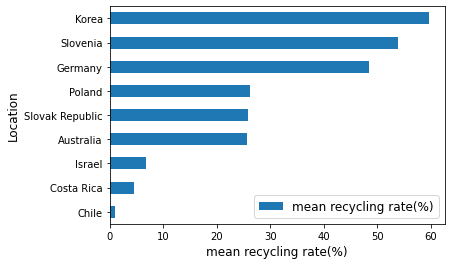

In [597]:
top5_withUS = sorted_recycle.loc[["Korea","Slovenia","Germany","Poland","Slovak Republic","Australia","Israel","Costa Rica","Chile"]].sort_values(by = ['mean_recycle'])
top5_withUS.plot.barh(y = 'mean_recycle',label='mean recycling rate(%)');

plt.xlabel('mean recycling rate(%)',fontsize=12);
plt.ylabel('Location', fontsize=12);

plt.legend(loc='lower right', fontsize='12');

## Difference between Top, Middle, Low Countries in each Factor

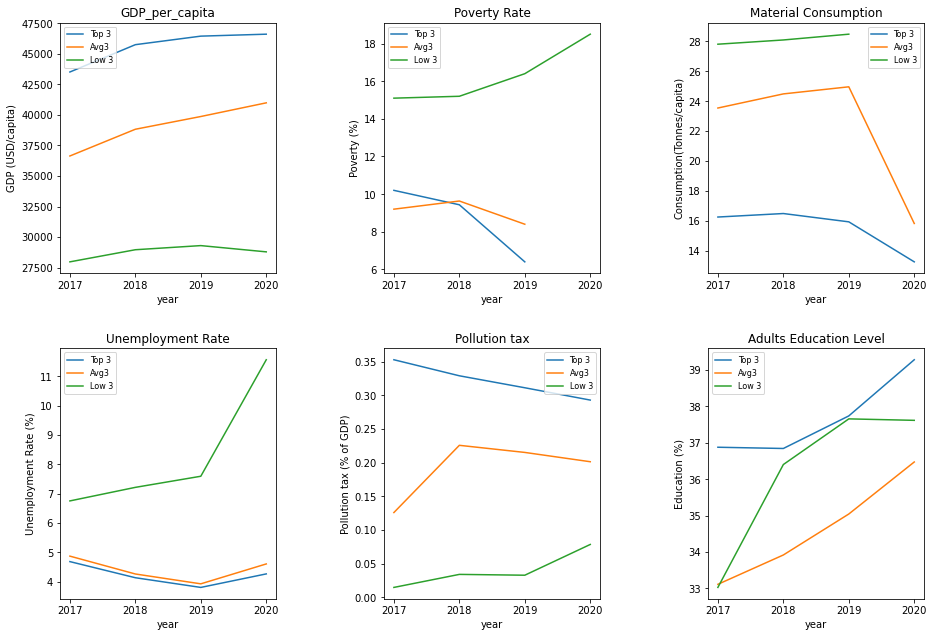

In [598]:
x = np.asarray([2017,2018,2019,2020])

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.plot(x.astype(str), top_3_mean["GDP_Value"], label = "Top 3");
plt.plot(x.astype(str), mid_3_mean["GDP_Value"], label = "Avg3");
plt.plot(x.astype(str), low_3_mean["GDP_Value"], label = "Low 3");
plt.xlabel('year',fontsize=10);
plt.ylabel('GDP (USD/capita)', fontsize=10);
plt.title('GDP_per_capita');
plt.legend(loc='upper left', fontsize='8');

plt.subplot(2,3,2)
plt.plot(x.astype(str), top_3_mean["Poverty"], label = "Top 3");
plt.plot(x.astype(str), mid_3_mean["Poverty"], label = "Avg3");
plt.plot(x.astype(str), low_3_mean["Poverty"], label = "Low 3");
plt.xlabel('year',fontsize=10);
plt.ylabel('Poverty (%)', fontsize=10);
plt.title('Poverty Rate');
plt.legend(loc='upper left', fontsize='8');

plt.subplot(2,3,3)
plt.plot(x.astype(str), top_3_mean["Consumption"], label = "Top 3");
plt.plot(x.astype(str), mid_3_mean["Consumption"], label = "Avg3");
plt.plot(x.astype(str), low_3_mean["Consumption"], label = "Low 3");
plt.xlabel('year',fontsize=10);
plt.ylabel('Consumption(Tonnes/capita)', fontsize=10);
plt.title('Material Consumption');
plt.legend(loc='upper right', fontsize='8');

plt.subplot(2,3,4)
plt.plot(x.astype(str), top_3_mean["Unemployment"], label = "Top 3");
plt.plot(x.astype(str), mid_3_mean["Unemployment"], label = "Avg3");
plt.plot(x.astype(str), low_3_mean["Unemployment"], label = "Low 3");
plt.xlabel('year',fontsize=10);
plt.ylabel('Unemployment Rate (%)', fontsize=10);
plt.title('Unemployment Rate');
plt.legend(loc='upper left', fontsize='8');

plt.subplot(2,3,5)
plt.plot(x.astype(str), top_3_mean["Pollution tax"], label = "Top 3");
plt.plot(x.astype(str), mid_3_mean["Pollution tax"], label = "Avg3");
plt.plot(x.astype(str), low_3_mean["Pollution tax"], label = "Low 3");
plt.xlabel('year',fontsize=10);
plt.ylabel('Pollution tax (% of GDP)', fontsize=10);
plt.title('Pollution tax');
plt.legend(loc='upper right', fontsize='8');

plt.subplot(2,3,6)
plt.plot(x.astype(str), top_3_mean["Education"], label = "Top 3");
plt.plot(x.astype(str), mid_3_mean["Education"], label = "Avg3");
plt.plot(x.astype(str), low_3_mean["Education"], label = "Low 3");
plt.xlabel('year',fontsize=10);
plt.ylabel('Education (%)', fontsize=10);
plt.title('Adults Education Level');
plt.legend(loc='upper left', fontsize='8');

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.3)

# Conclusion

## Factors that are related to the Recycling rate 
### 1. GDP
- The countries with the highest recycling rate show the highest GDP per capita and followed by the average recycling rate and the lowest recycling rate in order. Therefore, countries with higher GDP tend to have higher recycling rates.

### 2. Poverty Rate
- The poverty rate for the highest recycling rate countries and average recycling rate countries seems kind of similar to each other. However, it seems obvious that the poverty rate for the lowest recycling rate countries is the highest, and it is distinguishable from the top and average recycling rate countries. Therefore, even though the countries with the highest and average recycling rates don't differ much, the countries with the lowest recycling rate obviously seem to have the highest poverty rate.

### 3. Material Consumption
- The countries with lower recycling rates seem to consume more materials in this plot. Therefore, the countries with the lowest recycling rate have the highest material consumption, and the countries with the highest recycling rate have the lowest material consumption.

### 4. Unemployment Rate
- Like the plot of poverty rate, the unemployment rate for the highest recycling rate countries and average recycling rate countries seems almost similar to each other. However, the unemployment rate for countries that have the lowest recycling rate is obviously higher than countries with top and average recycling rates. Therefore, we may conclude that the countries with the lowest recycling rate obviously seem to have the highest unemployment rate.

### 5. Pollution tax
- We can see that the pollution tax plot seems similar to the GDP plot. Since the pollution tax is based on the GDP, we can first think that the higher pollution tax is applied to the countries with higher GDP. Therefore, we see that the countries with higher pollution taxes tend to recycle more.

## Factor that is not related to the Recycling rate
### Adults Education Level
- It is hard to tell that the recycling rate is related to adults' education level when we look at the plot. The countries with the highest recycling rate show the highest percentage of people who finished tertiary education, however, the countries with the lowest recycling rate show the second-highest and followed by countries with average recycling rate. Therefore, we cannot conclude that a higher percentage of completing education doesn't mean that they have a higher recycling rate.